In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [14]:
# load xlsx file
os.chdir('C:/Users/2925582/OneDrive - Universitetet i Stavanger/PHD/PHD code/Data/log')
df1 = pd.read_excel('12.xlsx', sheet_name='Transient 1',# from the 1st row
                    header=0)
df2 = pd.read_excel('12.xlsx', sheet_name='Transient 2',header = 0)
df3 = pd.read_excel('12.xlsx', sheet_name='Transient 3',header = 0)
df4 = pd.read_excel('12.xlsx', sheet_name='Transient 4',header = 0)
df5 = pd.read_excel('12.xlsx', sheet_name='Transient 5',header = 0)

# select the first 3 columns
df1 = df1.iloc[:,0:3]
df2 = df2.iloc[:,0:3]
df3 = df3.iloc[:,0:3]
df4 = df4.iloc[:,0:3]
df5 = df5.iloc[:,0:3]

# delect rows with nan
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()
df5 = df5.dropna()

# rename columns
df1.columns = ['t', 'p','dp']
df2.columns = ['t', 'p','dp']
df3.columns = ['t', 'p','dp']
df4.columns = ['t', 'p','dp']
df5.columns = ['t', 'p','dp']

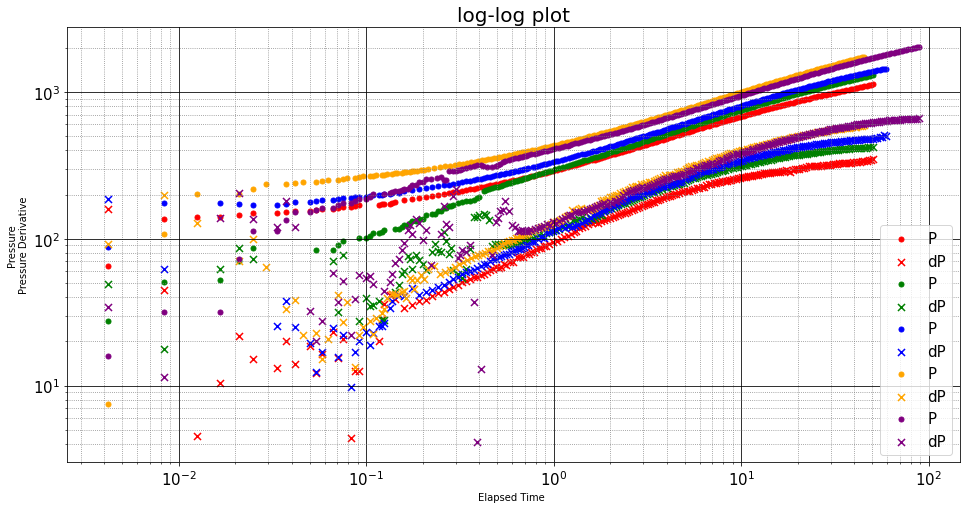

In [16]:
# plot df1,df2,df3,df4,df5 in log-log scale
fig, ax = plt.subplots(figsize=[16,8])
# make a color map of fixed colors
colors = ['red', 'green', 'blue', 'orange', 'purple']
ax.scatter(df1['t'],df1['p'], s=25, marker = "o", label= 'P', color = colors[0])
ax.scatter(df1['t'], df1['dp'], s=50, marker = "x", label= 'dP', color = colors[0])
ax.scatter(df2['t'],df2['p'], s=25, marker = "o", label= 'P', color = colors[1])
ax.scatter(df2['t'], df2['dp'], s=50, marker = "x", label= 'dP', color = colors[1])
ax.scatter(df3['t'],df3['p'], s=25, marker = "o", label= 'P', color = colors[2])
ax.scatter(df3['t'], df3['dp'], s=50, marker = "x", label= 'dP', color = colors[2])
ax.scatter(df4['t'],df4['p'], s=25, marker = "o", label= 'P', color = colors[3])
ax.scatter(df4['t'], df4['dp'], s=50, marker = "x", label= 'dP', color = colors[3])
ax.scatter(df5['t'],df5['p'], s=25, marker = "o", label= 'P', color = colors[4])
ax.scatter(df5['t'], df5['dp'], s=50, marker = "x", label= 'dP', color = colors[4])


# Label plot axes
ax.set_xlabel(r'Elapsed Time ')
ax.set_ylabel(r'Pressure' + '\n' + r'Pressure Derivative')

# Label the plot title
ax.set_title('log-log plot', fontsize=20)

# Adjust log axes style and limits

ax.set_xscale('log')
ax.set_yscale('log')

# adjust x label size
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
# adjust x ticks size
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

ax.legend(loc='best', fontsize=15)

ax.grid(which='major', axis='both', alpha=1, color='k')
ax.grid(which='minor', axis='both', linestyle=':', alpha=1, color='grey')

In [6]:
def calc_derivative(time, pressure, factor_L):

#Bourdet logarithmic pressure derivative
        
#Parameters
#----------
#time: time array (k,)
#pressure: bhp array (k,) 
#factor_L: smoothing factor (float)
        
#Returns
#-------
#deriv_pressure: bourdet derivative (m,)
           
    n_points = len(time)
    deriv_pressure = []
    i = 0
    while i < n_points:
        t1 = time[i]
        p1 = pressure[i]
        # encontrar o ti-1
        j = i
        while j > 0:
            if time[j] < t1 / np.exp(factor_L):
                break
            j -= 1
        # encontrar o ti+1
        k = i
        while k < n_points-1:
            if time[k] > t1 * np.exp(factor_L):
                break
            k += 1

        p0, p2 = pressure[j], pressure[k]
        t0, t2 = time[j], time[k]
        log_t0 = np.log(t0) if t0 != 0 else 0
        log_t1 = np.log(t1) if t1 != 0 else 0
        log_t2 = np.log(t2) if t2 != 0 else 0
        w1 = log_t1 - log_t0
        w2 = log_t2 - log_t1
        m1 = (p1-p0)/w1 if w1 > 0 else 0
        m2 = (p2-p1)/w2 if w2 > 0 else 0
        tdpdt = m1*w2/(w1+w2) + m2*w1/(w1+w2)
        deriv_pressure.append(tdpdt)
        i+=1
    return np.array(deriv_pressure)

In [7]:
# file folder
file_folder = "C:/Users/2925582/OneDrive - Universitetet i Stavanger/PHD/PHD code/TI_data/Shutin_data"

# for loop to read all the csv files in file folder
# save each file as a dataframe
# save all the dataframes in a list
df_list = []

for file in os.listdir(file_folder):

    if file.endswith(".csv"):
        file_path = os.path.join(file_folder, file)
        df = pd.read_csv(file_path)
        df = df[['Time','Pressure']].copy()
        df_list.append(df)
    else :
        print("no csv file")

In [8]:
df_list2 = []
for i in np.arange(len(df_list)):
    df = df_list[i]
    df['dp'] = np.abs(df["Pressure"] - df.loc[0, "Pressure"])
    df['dt'] = df["Time"] - df.loc[0, "Time"]

    df_der = df[['dt','dp']].copy()
    data = [df_der.iloc[:,0], df_der.iloc[:,1]]
    dt = df['dt'].values
    dp = df['dp'].values
    df_der['der'] = calc_derivative(dt,dp,0.1)
    df_list2.append(df_der)
     

In [11]:
df_der

,dt,dp,der
0,0.000000,0.00,0.000000
1,0.012500,1.98,94.904210
2,0.016667,27.49,97.339028
3,0.020833,50.71,64.368707
4,0.029167,52.23,98.645625
...,...,...,...
554,49.054167,1294.07,358.148777
555,49.337500,1296.12,358.748820
556,49.616667,1298.13,359.903208
557,49.900000,1300.17,361.882472


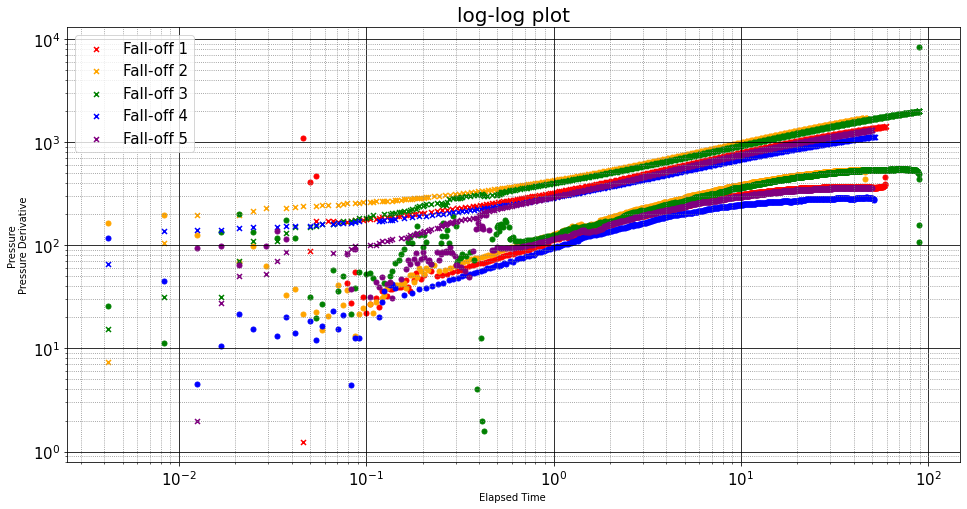

In [9]:
fig, ax = plt.subplots(figsize=[16,8])
# adjust font size
for i in np.arange(len(df_list2)):
    df_der = df_list2[i]
    # make a color list
    color_list = ['red','orange','green','blue','purple']
    ax.scatter(df_der['dt'], df_der['dp'], s=25, marker = "x", label= 'Fall-off %d'%(i+1), color = color_list[i])
    ax.scatter(df_der['dt'], df_der['der'], s=25, marker = "o", color = color_list[i])
 
    # Label plot axes
    ax.set_xlabel(r'Elapsed Time ')
    ax.set_ylabel(r'Pressure' + '\n' + r'Pressure Derivative')

    # Label the plot title
    ax.set_title('log-log plot', fontsize=20)

    # Adjust log axes style and limits
 
    ax.set_xscale('log')
    ax.set_yscale('log')

    # adjust x label size
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    # adjust x ticks size
    ax.tick_params(axis='x', which='major', labelsize=15)
    ax.tick_params(axis='y', which='major', labelsize=15)

    ax.legend(loc='best', fontsize=15)

    ax.grid(which='major', axis='both', alpha=1, color='k')
    ax.grid(which='minor', axis='both', linestyle=':', alpha=1, color='grey')



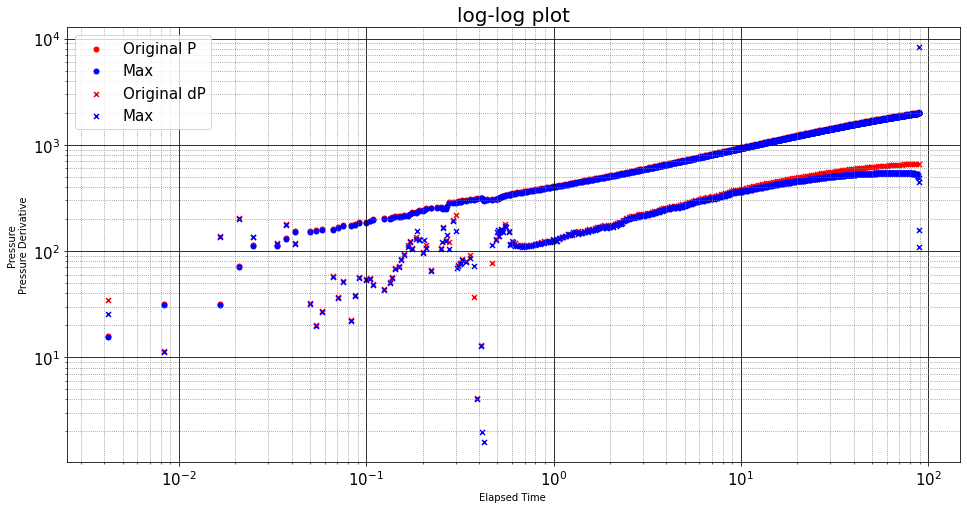

In [12]:
long = df_list2[2]
# plot in log-log scale
fig, ax = plt.subplots(figsize=[16,8])
ax.scatter(df5['t'],df5['p'], s=25, marker = "o", label= 'Original P', color = 'red')
ax.scatter(long['dt'],long['dp'], s=25, marker = "o", label = 'Max', color = 'blue')
ax.scatter(df5['t'], df5['dp'], s=25, marker = "x", label= 'Original dP', color = 'red')
ax.scatter(long['dt'], long['der'], s=25,  marker = "x",label = 'Max', color = 'blue')
# Label plot axes
ax.set_xlabel(r'Elapsed Time ')
ax.set_ylabel(r'Pressure' + '\n' + r'Pressure Derivative')

# Label the plot title
ax.set_title('log-log plot', fontsize=20)

# Adjust log axes style and limits

ax.set_xscale('log')
ax.set_yscale('log')

# adjust x label size
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
# adjust x ticks size
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

ax.legend(loc='best', fontsize=15)

ax.grid(which='major', axis='both', alpha=1, color='k')
ax.grid(which='minor', axis='both', linestyle=':', alpha=1, color='grey')

In [8]:
check = df5.copy()
dt = check['t'].values
dp = check['p'].values

check['der'] = calc_derivative(dt,dp,0.1)
check

,t,p,dp,der
0,0.004167,15.905997,34.440974,0.000000
1,0.008333,31.822203,11.491937,11.491819
2,0.016667,31.832413,137.340918,137.331445
3,0.020833,72.332470,204.492714,204.477843
4,0.025000,113.036713,136.917190,136.907646
...,...,...,...,...
238,80.054167,1963.482009,656.592246,552.353190
239,82.141667,1977.938293,657.034347,551.500063
240,84.325000,1992.394578,657.726894,550.821436
241,86.575000,2006.901909,657.301093,548.521002


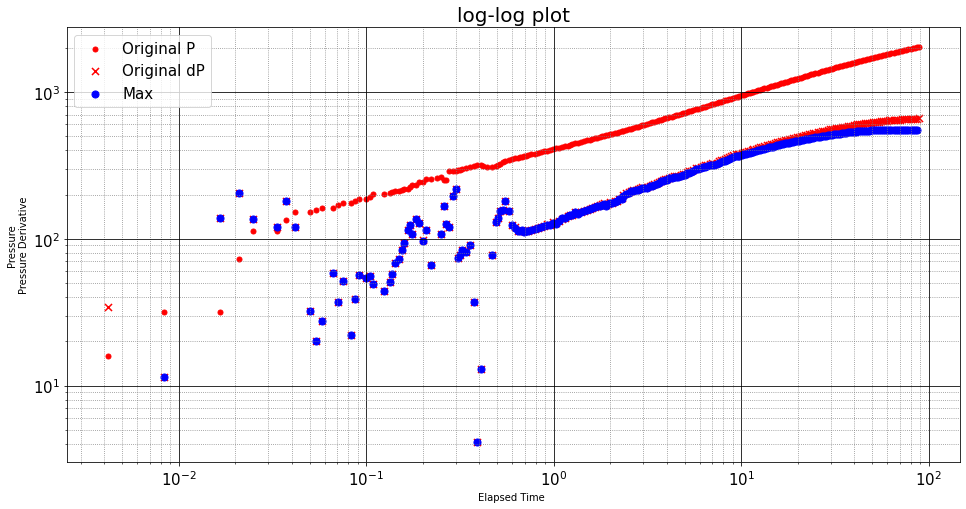

In [9]:
# plot in log-log scale
fig, ax = plt.subplots(figsize=[16,8])
ax.scatter(df5['t'],df5['p'], s=25, marker = "o", label= 'Original P', color = 'red')
ax.scatter(df5['t'], df5['dp'], s=50, marker = "x", label= 'Original dP', color = 'red')
ax.scatter(check['t'], check['der'], s=50, label = 'Max', marker = "o", color = 'blue')
# Label plot axes
ax.set_xlabel(r'Elapsed Time ')
ax.set_ylabel(r'Pressure' + '\n' + r'Pressure Derivative')

# Label the plot title
ax.set_title('log-log plot', fontsize=20)

# Adjust log axes style and limits

ax.set_xscale('log')
ax.set_yscale('log')

# adjust x label size
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
# adjust x ticks size
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

ax.legend(loc='best', fontsize=15)

ax.grid(which='major', axis='both', alpha=1, color='k')
ax.grid(which='minor', axis='both', linestyle=':', alpha=1, color='grey')

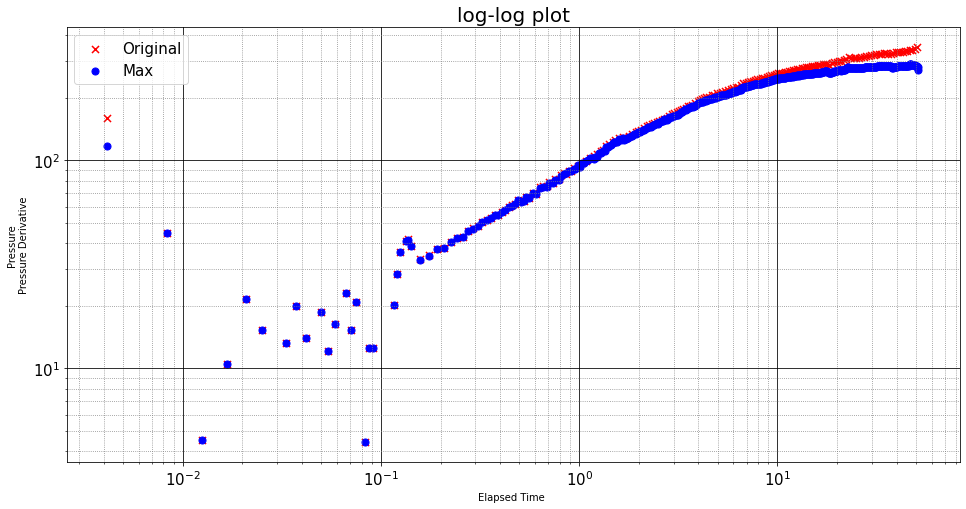

In [10]:
fir = df_list2[3]
# plot in log-log scale
fig, ax = plt.subplots(figsize=[16,8])
ax.scatter(df1['t'], df1['dp'], s=50, marker = "x", label= 'Original', color = 'red')
ax.scatter(fir['dt'], fir['der'], s=50, label = 'Max', marker = "o", color = 'blue')
# Label plot axes
ax.set_xlabel(r'Elapsed Time ')
ax.set_ylabel(r'Pressure' + '\n' + r'Pressure Derivative')

# Label the plot title
ax.set_title('log-log plot', fontsize=20)

# Adjust log axes style and limits

ax.set_xscale('log')
ax.set_yscale('log')

# adjust x label size
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
# adjust x ticks size
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

ax.legend(loc='best', fontsize=15)

ax.grid(which='major', axis='both', alpha=1, color='k')
ax.grid(which='minor', axis='both', linestyle=':', alpha=1, color='grey')